# **Group members:Amal s,Sachin S J,Siva prasad V,Yedukrishnan N,Manju K V**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("fish.csv")

In [3]:
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [4]:
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [5]:
data.isna().sum()

Bream    0
242.0    0
23.2     0
25.4     0
30.0     0
38.4     0
13.4     0
dtype: int64

In [6]:
data.shape

(84, 7)

label encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
org_data=data.copy()
le=LabelEncoder()

In [8]:
data["Bream"]=le.fit_transform(data["Bream"])

In [9]:
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,0,290.0,24.0,26.3,31.2,40.0,13.8
1,0,340.0,23.9,26.5,31.1,39.8,15.1
2,0,363.0,26.3,29.0,33.5,38.0,13.3
3,0,430.0,26.5,29.0,34.0,36.6,15.1
4,0,450.0,26.8,29.7,34.7,39.2,14.2


In [10]:
from sklearn.cluster import KMeans

In [11]:
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [12]:
wcss

[12199999.46547619,
 4414878.621931034,
 1906491.4708875124,
 880242.3648194443,
 500628.68217693234,
 338941.6882083333,
 217852.07623376622,
 131820.77984487737,
 91876.98120018872,
 74653.01813492063,
 61727.05176190476,
 49130.10382539682]

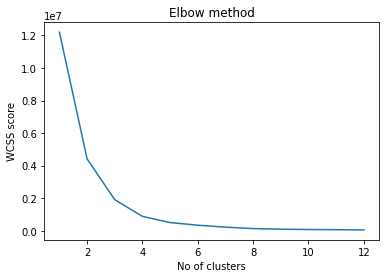

In [13]:
plt.plot(range(1,13),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.show()

In [14]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3], dtype=int32)

In [16]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 1 1 3 3 3 3]


In [17]:
from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data,y_kmeans)
print(silhouette_sc)

0.6168898189402219
